# Candlechart generator
# ローソク足チャート生成器

OHLCのcsvファイルからローソク足チャートを生成します。



## import module
## モジュールのインポート

In [24]:
import numpy as np
import pandas as pd
import talib as ta # 様々なテクニカル指標

import sys
#import time
#import datetime

import matplotlib
matplotlib.use('Agg') # グラフを描画しない？
import matplotlib.pyplot as plt # グラフ
import matplotlib.dates as mdates # 日付
import mpl_finance as mpf # ローソク足

## constant
## 定数

In [29]:
INPUT_PATH = "csv/USD_JPY_sample.csv"
OUTPUT_PATH = "candlechart/"
#INPUT_PATH = "../sotsuken/program/csv_realtime/USD_JPY.csv" # 入力に用いるcsvのパス
#OUTPUT_PATH = "../sotsuken/program/chart/usd_jpy" # 生成した画像の出力先のフォルダのパス
BEGIN_DATE = "2010-6-1"# 起点
END_DATE = ""# 終点
CHART_RANGE = 30 # 何日分のデータからチャートを出力するか。変数名はDAYSのほうが適切？

# グラフに関する定数
WIDTH, HEIGHT = 4, 4 # 画像の幅と高さ（インチ）
DPI = 32 # 解像度
CANDLE_WIDTH = 0.5 # ローソクの太さ
COLOR_UP = "r" # ローソク（上昇）の色
COLOR_DOWN = "b" # ローソク（下落）の色

## generate chartes
## チャートを生成

OHLC samples...
              Open    High     Low   Close
Date                                      
2017-01-03  117.33  118.59  117.17  117.75
2017-01-04  117.71  118.18  117.06  117.24
2017-01-05  117.22  117.43  115.22  115.35
2017-01-06  115.37  117.16  115.08  117.00
2017-01-09  117.00  117.49  115.97  116.06
Complete!


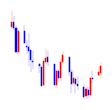

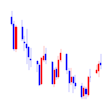

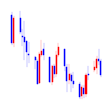

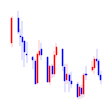

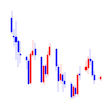

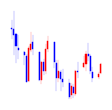

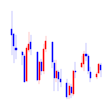

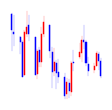

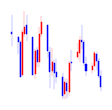

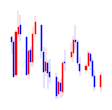

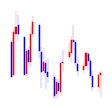

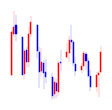

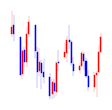

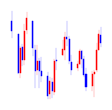

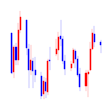

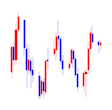

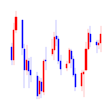

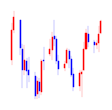

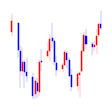

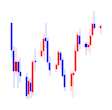

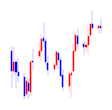

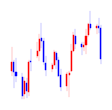

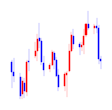

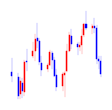

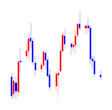

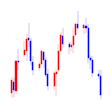

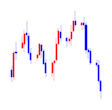

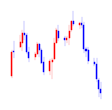

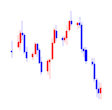

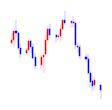

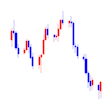

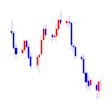

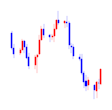

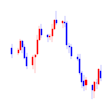

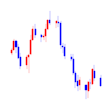

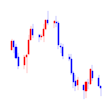

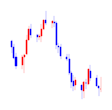

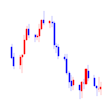

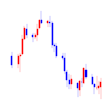

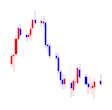

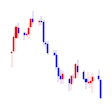

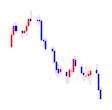

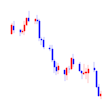

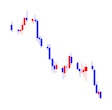

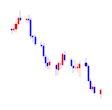

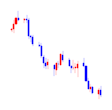

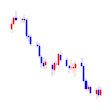

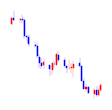

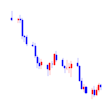

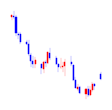

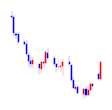

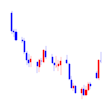

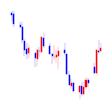

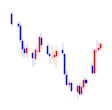

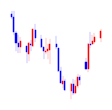

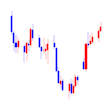

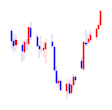

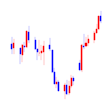

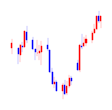

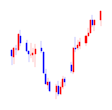

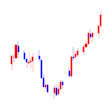

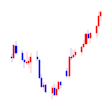

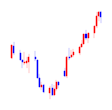

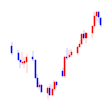

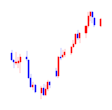

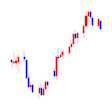

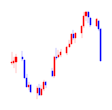

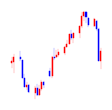

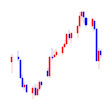

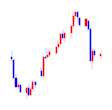

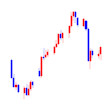

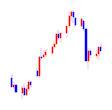

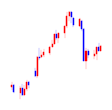

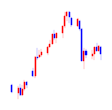

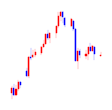

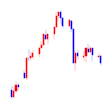

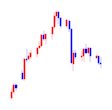

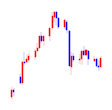

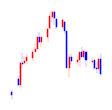

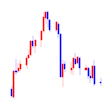

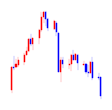

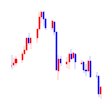

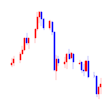

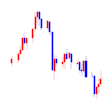

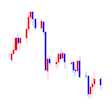

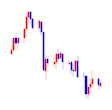

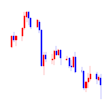

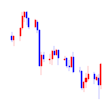

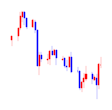

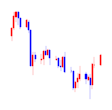

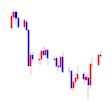

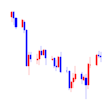

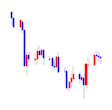

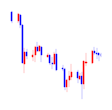

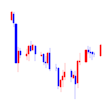

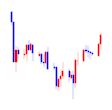

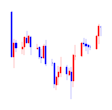

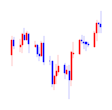

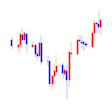

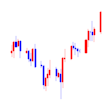

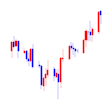

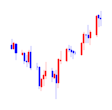

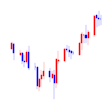

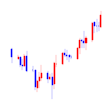

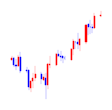

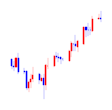

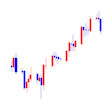

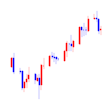

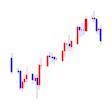

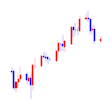

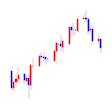

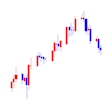

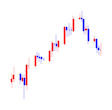

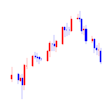

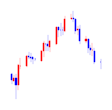

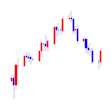

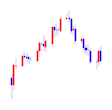

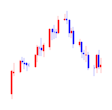

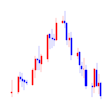

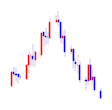

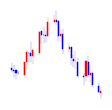

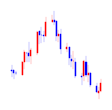

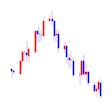

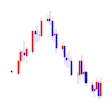

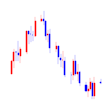

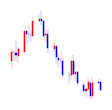

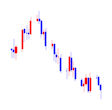

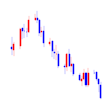

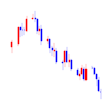

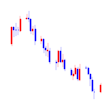

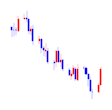

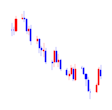

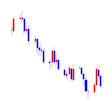

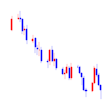

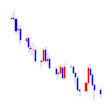

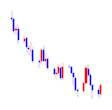

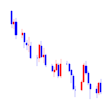

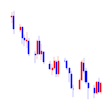

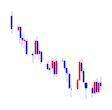

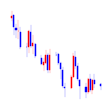

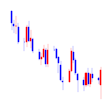

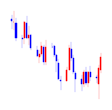

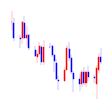

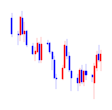

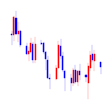

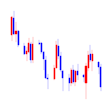

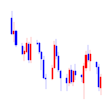

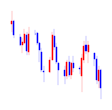

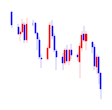

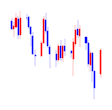

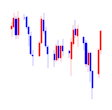

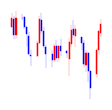

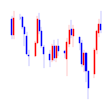

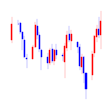

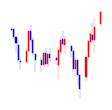

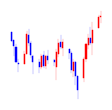

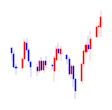

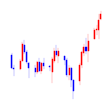

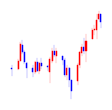

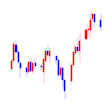

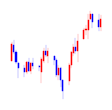

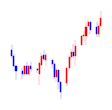

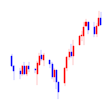

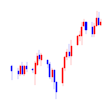

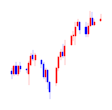

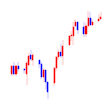

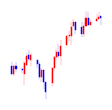

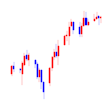

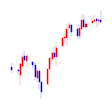

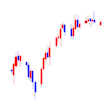

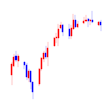

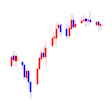

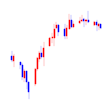

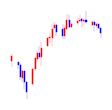

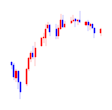

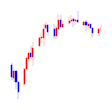

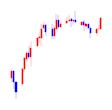

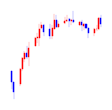

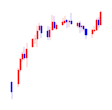

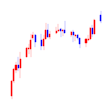

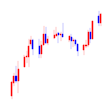

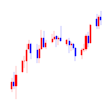

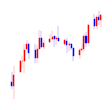

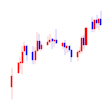

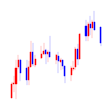

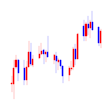

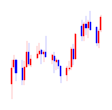

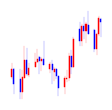

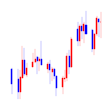

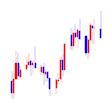

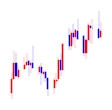

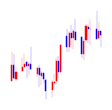

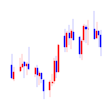

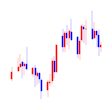

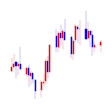

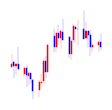

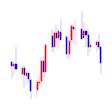

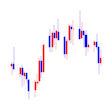

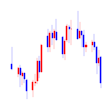

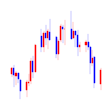

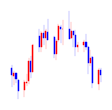

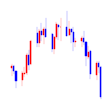

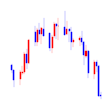

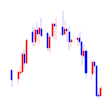

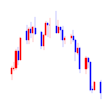

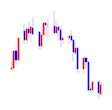

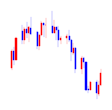

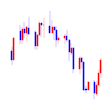

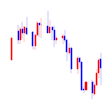

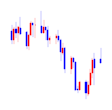

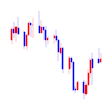

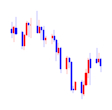

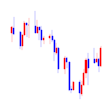

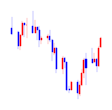

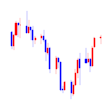

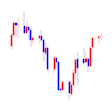

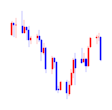

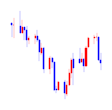

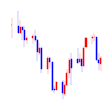

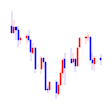

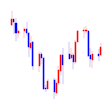

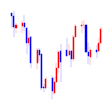

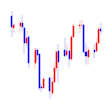

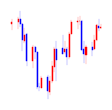

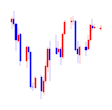

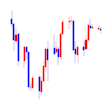

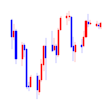

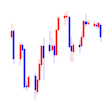

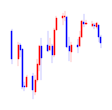

In [30]:
df = pd.read_csv(INPUT_PATH, index_col='Date', parse_dates=True)

if END_DATE == "":
    df = df[BEGIN_DATE:]
else:
    df = df[BEGIN_DATE:END_DATE]

print("OHLC samples...")
print(df.head())

if len(df.columns) != 4:
    print("Error!")
    sys.exit()
    

for start_date, end_date in zip(df.index[0:-CHART_RANGE], df.index[CHART_RANGE:]):    
    # データの切り出し
    _df = df[start_date:end_date].copy()
    _df.index = mdates.date2num(_df.index)
    USD_JPY = _df.reset_index().values
    
    # グラフの作成
    fig = plt.figure(figsize=(WIDTH, HEIGHT), dpi=DPI) # figsizeは縦横の長さ（インチ）
    ax = plt.subplot()

    # ローソク足を描画
    mpf.candlestick_ohlc(ax, USD_JPY, width=CANDLE_WIDTH, colorup=COLOR_UP, colordown=COLOR_DOWN)

    # 日付の設定
    locator = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator))

    # 枠線等の削除
    plt.tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    
    #ax.grid()
    
    # 保存
    plt.savefig(OUTPUT_PATH + '/USDJPY_' + start_date.strftime('%Y%m%d') + '_' + end_date.strftime('%Y%m%d') +'.png') # グラフを保存
    
print("Complete!")